In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from matplotlib import rcParams
from cycler import cycler

# -- Figure size --
rcParams['figure.figsize'] = (12, 4)
# -- Saving Options --
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 500
rcParams['savefig.transparent'] = True
# -- Plot Styles --
rcParams['lines.linewidth'] = 0.3
teal = (106 / 256, 197 / 256, 179 / 256)
navy = (56 / 256, 74 / 256, 143 / 256)
pink = [199 / 255, 99 / 255, 150 / 255]
rcParams['axes.prop_cycle'] = cycler(color=[teal, navy, pink])

In [8]:
from tqdm.notebook import tqdm

In [9]:
import nltk

In [10]:
def save_plot(title):
  plt.ylabel('')
  plt.savefig(f'{title}.pdf', dpi=300, bbox_inches='tight')

In [11]:
df = pd.read_csv('subtaskA_train.csv').drop(columns=['Id'])

In [12]:
df.head()

,comment_text,conspiratorial
0,⚡Se non ci fossero soldati non ci sarebbero gu...,0
1,"21/08/21]( [PRE-PRINT]\n\n📄__ ""Shedding of Inf...",1
2,PAURA E DELIRIO ALLA CNN: IL MINISTERO DELLA V...,1
3,L'Aspirina non aumenta la sopravvivenza dei pa...,0
4,L'Italia non puo' dare armi lo vieta la Costit...,0


In [70]:
df.shape

(1842, 2)

In [71]:
found=0
for e in list(df.columns):
    if df[e].isna().any():
        found+=1
        print(e, df[e].isna().sum())
if found==0:
  print('No NaN values found')


No NaN values found


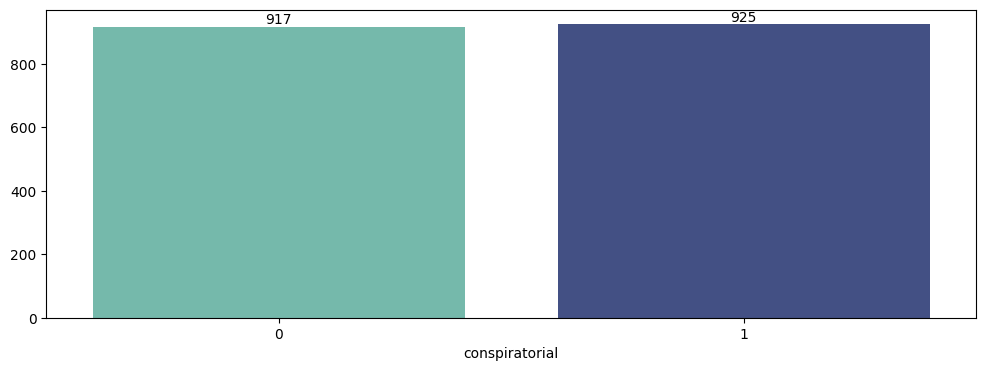

In [72]:
rcParams['figure.figsize'] = (12, 4)
ax = sns.countplot(data=df, x='conspiratorial')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.ylabel('')
plt.savefig('conspiratorial_distribution_bar.pdf', dpi=300, bbox_inches='tight')
plt.show()

## NLTK preprocessing

### distribuzione parole

In [73]:
import re
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
punteggiatura = ['.', ',', ':', ';', '?', '!', '--', '-', '(', ')', '``', "''", '#', '$', '[', ']', '``', '_', "''", '*', '...']

In [75]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('italian'))

def clean_text(text, lower=False):
    """ text: a string
        return: modified initial string """
    if lower:
      text = text.lower() # lowercase text
    text = re.sub(r'[/(){}\[\]\|@,;]', ' ', text) # substitute the matched string with space.
    text = re.sub(r'[#+_]', '', text) # substitute bad symbols with nothing.
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

df['comment_text'] = df['comment_text'].apply(clean_text)

In [5]:
df.head(10)

NameError: ignored

In [77]:
tokens = list()

for row in df.comment_text:
    tokens_sent = nltk.word_tokenize(row)
    for token in tokens_sent:
      if not token.isnumeric() and token not in punteggiatura:
        tokens.append(token)

    #tokens += tokens_sent

print('tokens:', len(tokens),
      '\nvocabulary:', len(set(tokens)),
      '\nTTR:', len(set(tokens))/len(tokens))

tokens: 58795 
vocabulary: 17286 
TTR: 0.2940045922272302


In [78]:
tokens[:50]

['⚡Se',
 'soldati',
 'guerre',
 'PRE-PRINT',
 '📄',
 'Shedding',
 'of',
 'Infectious',
 'SARS-CoV-2',
 'Despite',
 'Vaccination',
 '🇮🇹',
 'Diffusione',
 'SARS-CoV-2',
 'nonostante',
 'vaccinazione',
 '📊',
 'La',
 'variante',
 'Delta',
 'SARS-CoV-2',
 'può',
 'causare',
 'elevate',
 'cariche',
 'virali',
 'trasmissibile',
 'contiene',
 'mutazioni',
 'conferiscono',
 'fuga',
 'immunitaria',
 'parziale',
 'indagini',
 "sull'epidemia",
 'suggeriscono',
 'persone',
 'vaccinate',
 'possono',
 'diffondere',
 'variante',
 'Delta',
 '⚠️',
 'risultati',
 'indicano',
 'persone',
 'asintomatiche',
 'comple',
 'vaccinate',
 'possono']

In [79]:
words, freqs = np.unique(tokens, return_counts=True)[0], np.unique(tokens, return_counts=True)[1]

sorted_freqs = sorted(zip(freqs, words), reverse=True)
sorted_frequencies, sorted_words = zip(*sorted_freqs)

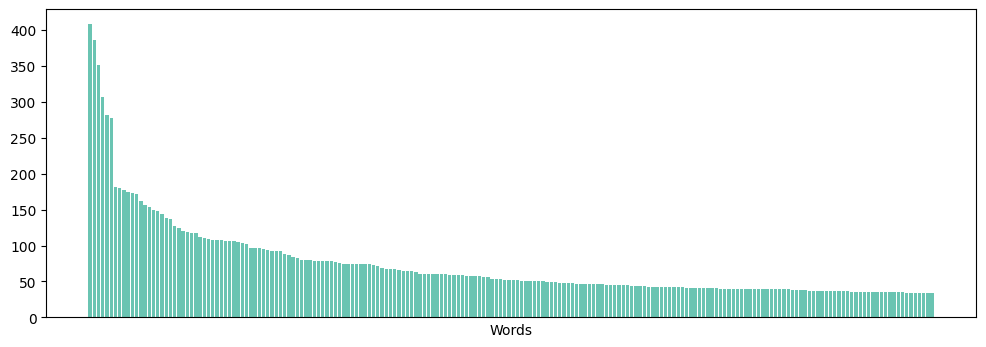

In [80]:
plt.bar(sorted_words[:200], sorted_frequencies[:200])
plt.xlabel('Words')
plt.ylabel('Frequenza')

plt.xticks([])
plt.ylabel('')
plt.savefig('zipf_A.pdf', dpi=300, bbox_inches='tight')
plt.show()

### distribuzione POS

In [81]:
#punteggiatura = ('.', ',', ':', ';', '?', '!', '--', '-', '(', ')', '``', "''", '#', '$')
aggettivi = ('JJ', 'JJR', 'JJS')
sostantivi = ('NN', 'NNS', 'NNP', 'NNPS')
verbi = ('VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'MD')
avverbi = ('RB', 'RBR', 'RBS', 'WRB')
articoli = ('DT',)
preposizioni = ('IN', 'RP')
congiunzioni = ('CC', 'IN')
pronomi = ('PRP', 'PRPS', 'WP', 'WPS')

In [82]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [83]:
tok_pos = nltk.pos_tag(tokens) #(token, POS)

pos = list() #pos only
for tok, p in tok_pos:
    if p not in punteggiatura:
        pos.append(p)


In [84]:
pos_count= list()
for p, count in zip(np.unique(pos, return_counts=True)[0], np.unique(pos, return_counts=True)[1]):
    pos_count.append((count,p))

sorted(pos_count, reverse=True)[:10]

[(31482, 'NN'),
 (14913, 'NNP'),
 (5228, 'JJ'),
 (1117, 'VBZ'),
 (1058, 'RB'),
 (882, 'IN'),
 (854, 'FW'),
 (828, 'VBP'),
 (511, 'VBD'),
 (458, 'NNS')]

In [85]:
def mergePOS(pos_lst, pos_counts, pos_dict, pos_key):
    for count, pos in pos_counts:
        if pos in pos_lst:
            pos_dict[pos_key]= pos_dict.get(pos_key) + count

In [86]:
pos_grouped = {
    'adjectives':0,
    'nouns':0,
    'verbs':0,
    'adverbs':0,
    'articles':0,
    'prepositions':0,
    'conjunctions':0
}

mergePOS(aggettivi, pos_count, pos_grouped, 'adjectives')
mergePOS(sostantivi, pos_count, pos_grouped, 'nouns')
mergePOS(verbi, pos_count, pos_grouped, 'verbs')
mergePOS(avverbi, pos_count, pos_grouped, 'adverbs')
mergePOS(articoli, pos_count, pos_grouped, 'articles')
mergePOS(preposizioni, pos_count, pos_grouped, 'prepositions')
mergePOS(congiunzioni, pos_count, pos_grouped, 'conjunctions')

In [87]:
pos_grouped

{'adjectives': 5244,
 'nouns': 46857,
 'verbs': 2755,
 'adverbs': 1073,
 'articles': 163,
 'prepositions': 886,
 'conjunctions': 960}

In [88]:
sorted_pos = {k: v for k, v in sorted(pos_grouped.items(), key=lambda item: item[1], reverse=True)}

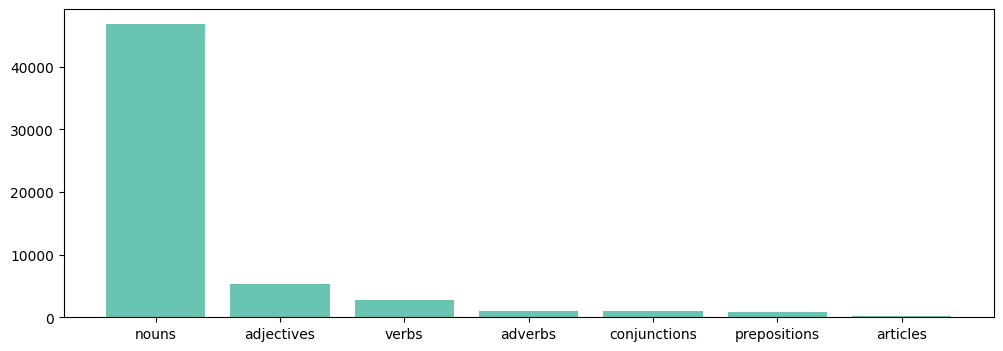

In [89]:
plt.bar(sorted_pos.keys(), sorted_pos.values())

#plt.xticks(rotation=45)
plt.ylabel('')
plt.savefig('POS_distribution_A.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [90]:
pos_grouped['verbs']/pos_grouped['nouns']

0.05879591096314318

### NE

In [91]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [92]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [93]:
def extract_NE(tok_pos, NE):
  NEs = list()
  freq_NEs = list()

  # si ottiene l'albero, quindi si controlla che ci siano nodi intermedi etichettati
  # con una data NE
  ent_nom = nltk.ne_chunk(tok_pos)
  for nodo in ent_nom:
      name_ent = ''
      if hasattr(nodo, 'label'):
          if nodo.label() == NE:
              for figlio in nodo.leaves():
                  # si prende il primo elemento di ogni foglia, corrispondente al token,
                  # quindi si aggiunge la stringa ad una lista
                  name_ent += ' ' + figlio[0]
              NEs.append(name_ent)

  for ne in list(set(NEs)):
      freq = NEs.count(ne)
      freq_NEs.append((freq, ne))
  freq_NEs = sorted(freq_NEs, reverse=True)

  return freq_NEs

In [94]:
freq_persone = extract_NE(tok_pos, 'PERSON')

In [95]:
freq_persone[:15]

[(79, ' Non'),
 (35, ' Questo'),
 (32, ' Trump'),
 (30, ' Sono'),
 (29, ' Per'),
 (24, ' Putin'),
 (22, ' Delta'),
 (20, ' Siamo'),
 (20, ' Questa'),
 (18, ' Draghi'),
 (18, ' Covid'),
 (17, ' Ecco'),
 (16, ' Abbiamo'),
 (15, ' Perché'),
 (14, ' Che')]

In [96]:
STOPWORDS = set(stopwords.words('italian'))
' Questo'.split()[0].lower() in STOPWORDS

True

In [97]:
persone_dict = dict()
threshold = 1
threshold_token = 3

for count, token in freq_persone:
  if count >= threshold and len(token.split()[0]) > threshold_token and token.split()[0].lower() not in STOPWORDS:
    persone_dict[token] = count

In [98]:
freq_gpe = extract_NE(tok_pos, 'GPE')


In [99]:
freq_gpe[:15]

[(84, ' Russia'),
 (64, ' Italia'),
 (26, ' Ucraina'),
 (14, ' Chi'),
 (10, ' Paese'),
 (9, ' Taiwan'),
 (7, ' Washington'),
 (7, ' New York'),
 (7, ' Israele'),
 (7, ' Germania'),
 (6, ' Roma'),
 (6, ' Europa'),
 (6, ' America'),
 (5, ' Tuttavia'),
 (5, ' India')]

In [100]:
gpe_dict = dict()
threshold = 1
threshold_token = 2

for count, token in freq_gpe:
  if count >= threshold and len(token.split()[0]) > threshold_token and token.split()[0].lower() not in STOPWORDS:
    gpe_dict[token] = count

## wordcloud

In [101]:
from wordcloud import WordCloud, ImageColorGenerator

In [102]:
persone_merged = list()
for token in list(persone_dict.keys()): #list(df[df['conspiratorial'] == 1].comment_text):
  freq = persone_dict[token]
  token += ' '
  token = (token * freq)# * persone_dict[token])
  persone_merged += (token.split())

In [103]:
import random

text = ''
random.shuffle(persone_merged)
for token in persone_merged:
  text += token + ' '
text

"Durham Le Elmau Glossario Elon Omicron Romania Paciolla Militari Nuovo Mario Monkeypox Membro Italia António Meluzzi Moderna Vanderbilt Putin Trump Bill Venezuela Davos Vova Generale Unito Italia Vostok Arne Bassa Sapete Bomob Gruppo Rumble Suprema Ormai Esteri Sileri Europa Perù Twitter Corpo Sindaco Donald Bezimennoe Vito Vaiolo Trump Andare Egidio Nord Cremlino Sgarbi Corbyn Volodin Dario Di Trump Roger Lorenzin Saper Esteri Dichiara Daltronde Notizia Covid Aleksandr Ciao Licia Bologna William Gonzalo Bianchi Hitler Psichiatria Auschwitz Semiramis Ribellatevi Quattro Fallimento Italia Ma Ecco Fubini Povera Russell Zelensky Maestro Elon Salvini Davos Paese Scienza Praticamente Nervuti E Aumentano Ucraina Luna Giulietto Viene Quasi Cina Gonzalo Donbass Elon Oliviero Russia Matteo Data Al Lega Secondo Kherson Joanna Esteri Nel Kash Danneggiati Mondiale Patel Stati Novilara La Fusillo Lombardia Attenzione Putin Pensano Schifoso Stato Europea Viviamo Devo Donetsk Quando Moderna Parlamen

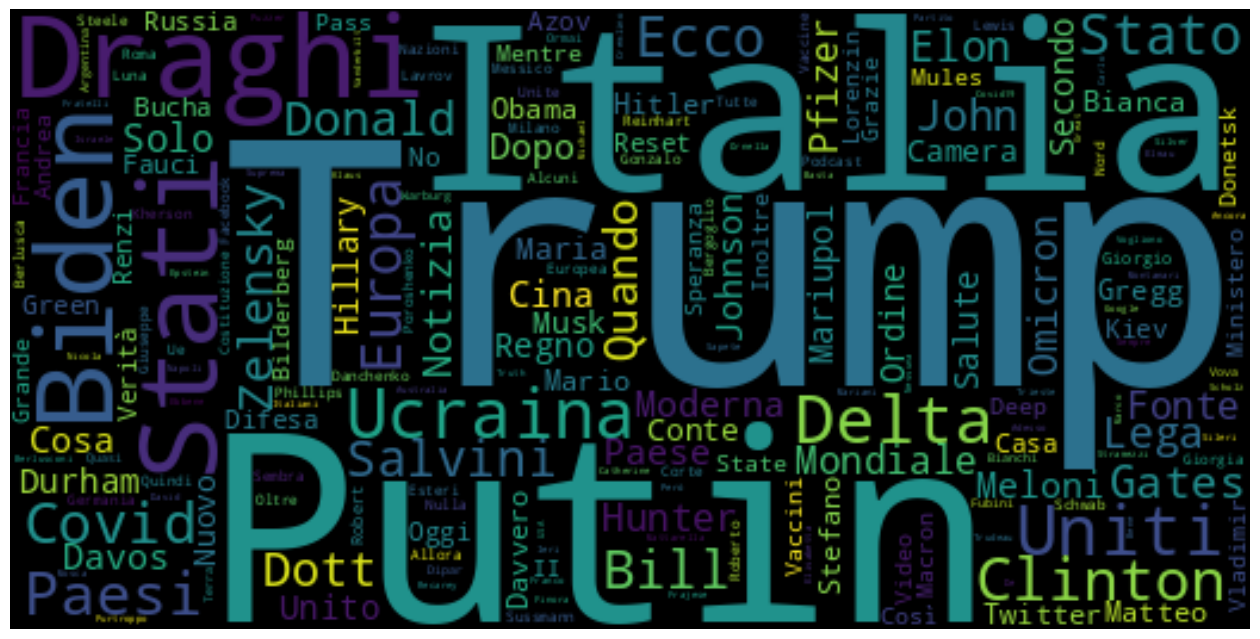

In [104]:
conspiratorial_msg_cloud = WordCloud(width=520,
                                     height=260,
                                     stopwords=STOPWORDS,
                                     #max_font_size=50,
                                     #background_color = "black", colormap = 'Pastel1'
                                     ).generate(text)
plt.figure(figsize=(16,10))
plt.imshow(conspiratorial_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.savefig('wordcloud_person_A.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [105]:
gpe_merged = list()
for token in list(gpe_dict.keys()): #list(df[df['conspiratorial'] == 1].comment_text):
  freq = gpe_dict[token]
  token += ' '
  token = (token * freq)# * persone_dict[token])
  gpe_merged += (token.split())

In [106]:
text = ''
random.shuffle(gpe_merged)
for token in gpe_merged:
  text += token + ' '
text

'Israele Meloni York Graaff Taking Kong Indomethacin India Ucraina Russia Kazakistan Danimarca Italia Israele Ukraina Lancet New York Cina Russia Russia Colleghiamo Russia Italia Ucraina Settanta Ucraina Russia Italia Europa Israele Paese Chigi Italia Europa Cina Italia Italia Russia Ovvia Coronavirus Ucraina Italia Polonia India Canada Italia Ucraina Paese Eurogendfor Russia Russia Roma Canada Daria Russo Russia Russia Italia SORDINA Washington Washington Italia CORSIA York Peggio Roma Crollano York Italia Italia Europa Russia Calenda Colonia Italia Ricorda Chiede Paese Taiwan Palestina Russia Italia Malore Sembra Italia America Italia Chissà Cina Italia Studi Russia Germania Melania Taiwan Italia Cina Italia New Titolo Russia South Inghilterra Italiana Calenda Russia York New Italia Ucraina Russia Taiwan Calabria America Tachipirina Quando Russia Green Germania Russia Russia Russia Russia Russia Italia Russia Lombardia Ucraina Europa America Italia India Trump Italia Italia Italiano 

In [ ]:
conspiratorial_msg_cloud = WordCloud(width=520,
                                     height=260,
                                     stopwords=STOPWORDS,
                                     #max_font_size=50,
                                     #background_color = "black", colormap = 'Pastel1'
                                     ).generate(text)
plt.figure(figsize=(16,10))
plt.imshow(conspiratorial_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.savefig('wordcloud_gpe_A.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Sentiment analysis

In [109]:
!pip uninstall vaderSentiment
!pip install vader-multi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 2.5 MB/s eta 0:00:00


VADER è un lexicon pensato solo per l'inglese

vader-multi effettua una traduzione della frase in inglese tramite Google Translate API e puoi effettua la SA tramite la libreria "Vader" in inglese.

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("VADER is smart, handsome, and funny.")

{'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}

In [14]:
analyzer.polarity_scores("VADER è MOLTO INTELLIGENTE, bello e DIVERTENTE!!!")

{'neg': 0.0, 'neu': 0.224, 'pos': 0.776, 'compound': 0.9417}

In [15]:
print(df['comment_text'][3])
analyzer.polarity_scores(df['comment_text'][3])

L'Aspirina non aumenta la sopravvivenza dei pazienti ricoverati in ospedale per Covid-19,


{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.2411}

In [16]:
df_vader = pd.DataFrame(columns=['text', 'neg', 'neu', 'pos','compound', 'conspiratorial'])

In [17]:
for i, row in tqdm(df.iterrows(), total=len(df)):
    df_vader.loc[i, 'text'] = row['comment_text']
    df_vader.loc[i, 'conspiratorial'] = row['conspiratorial']
    try:
      score = analyzer.polarity_scores(row['comment_text'])
      for key in score.keys():
          df_vader.loc[i, key] = score[key]
    except IndexError:
      continue
    df_vader.loc[i, 'conspiratorial'] = row['conspiratorial']

  0%|          | 0/1842 [00:00<?, ?it/s]

In [18]:
df_vader.head()

,text,neg,neu,pos,compound,conspiratorial
0,⚡Se non ci fossero soldati non ci sarebbero gu...,0.145,0.661,0.193,0.1838,0
1,"21/08/21]( [PRE-PRINT]\n\n📄__ ""Shedding of Inf...",0.032,0.929,0.039,-0.0772,1
2,PAURA E DELIRIO ALLA CNN: IL MINISTERO DELLA V...,0.101,0.807,0.092,-0.8869,1
3,L'Aspirina non aumenta la sopravvivenza dei pa...,0.179,0.821,0.0,-0.2411,0
4,L'Italia non puo' dare armi lo vieta la Costit...,0.215,0.56,0.225,0.0274,0


In [19]:
df_vader.shape

(1842, 6)

In [20]:
df_vader.query('compound > 0')

,text,neg,neu,pos,compound,conspiratorial
0,⚡Se non ci fossero soldati non ci sarebbero gu...,0.145,0.661,0.193,0.1838,0
4,L'Italia non puo' dare armi lo vieta la Costit...,0.215,0.56,0.225,0.0274,0
5,Ma non siete stufi di essere presi in giro??,0.245,0.446,0.308,0.1446,1
6,**Ritengo questo audio piuttosto importante**:...,0.041,0.883,0.076,0.4391,1
9,Tesla voleva portare a tutti energia gratuita ...,0.0,0.805,0.195,0.5556,0
...,...,...,...,...,...,...
1825,alla canna del gas! nn sanno piu cosa inventar...,0.05,0.862,0.088,0.4003,1
1830,"Cari amici, abbiamo appena ricevuto questo mes...",0.0,0.59,0.41,0.9848,0
1834,**Carceri: i programmi dei partiti a confronto...,0.0,0.942,0.058,0.4019,0
1836,Conviviamo con l AIDS da 40 anni e la promessa...,0.048,0.875,0.077,0.781,1


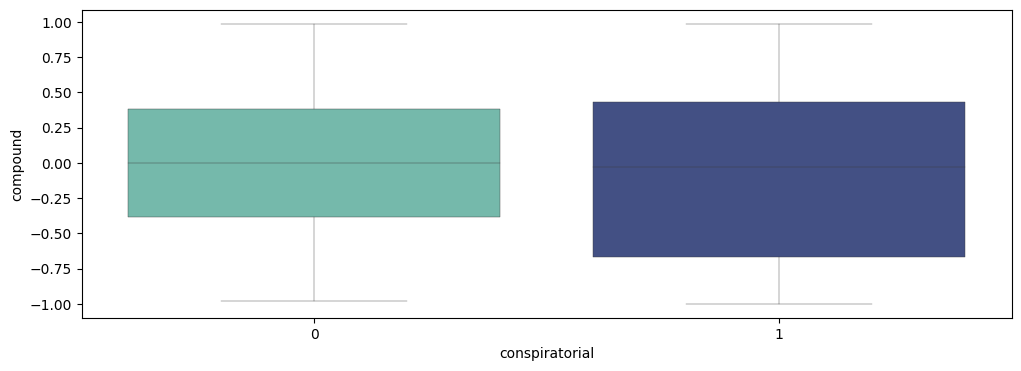

In [21]:
sns.boxplot(data=df_vader, x='conspiratorial', y='compound')
plt.show()

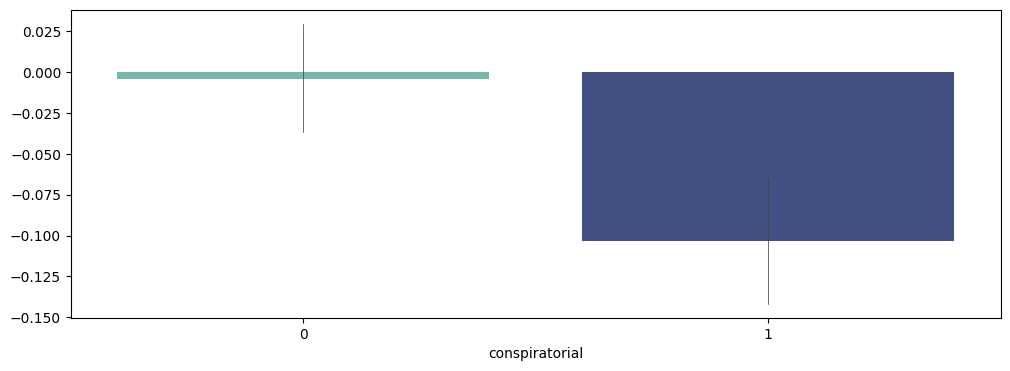

In [23]:
sns.barplot(data=df_vader, x='conspiratorial', y='compound')
save_plot('compound_sentiment')
plt.show()

i post cospirazionisti tendono ad avere una sentiment più negativa

In [ ]:
df_vader.columns[1:4]

Index(['neg', 'neu', 'pos'], dtype='object')

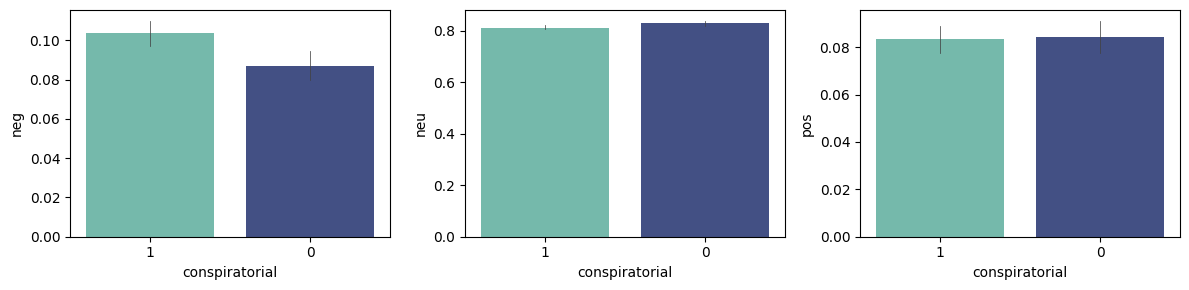

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

for i, col in enumerate(df_vader.columns[1:4]):
    sns.barplot(data=df_vader, x='conspiratorial', y=col,
                order=list(reversed(df_vader.conspiratorial.unique())), ax=axs[i])

plt.tight_layout()

plt.savefig('vader_barplots.pdf', dpi=300, bbox_inches='tight')
plt.show()

notare la scala dei dati, il sentimento negativo è comunque minimo e non va mai oltre lo 0.12

In [ ]:
df_vader['compound'].mean(), df_vader['compound'].std()

(-0.05408875611080936, 0.5587746794069434)

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


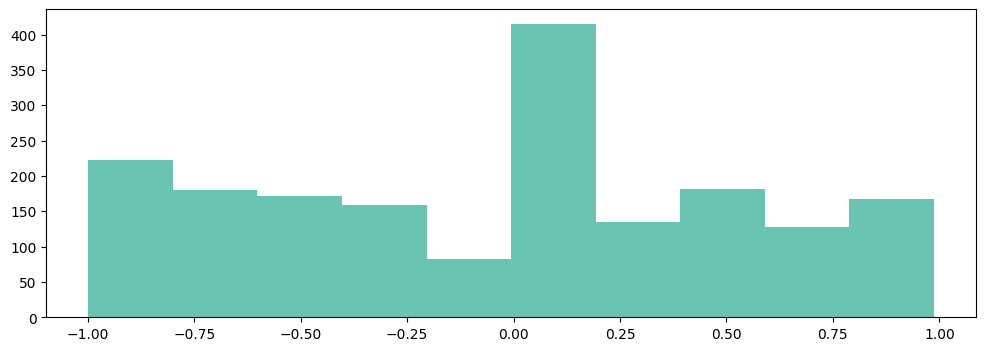

In [ ]:
plt.hist(df_vader['compound'])
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


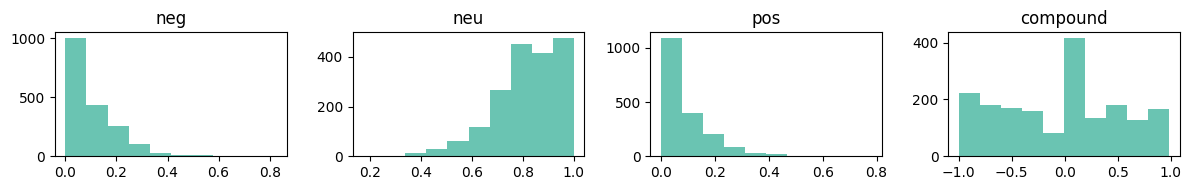

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(12, 2))

for i, col in enumerate(df_vader.columns[1:5]):
  ax=axs[i]
  ax.hist(df_vader[col])
  ax.set_title(col)

plt.tight_layout()

#plt.savefig('vader_barplot.pdf', dpi=300, bbox_inches='tight')
plt.show()